**GOAL**: Minimize fraudulent credit card transactions.

***1. EDA Steps***

Step 1 - Read in the data set and perform preliminary checks

In [ ]:
import pandas as pd
credit_df = pd.read_csv("creditcard_small.csv")
print(credit_df)

classes = pd.unique(credit_df['Class'])
num_classes = len(classes)
each_class = credit_df['Class'].value_counts()

print(classes)
print(num_classes)
print(each_class)

             V1        V2        V3        V4        V5        V6        V7  \
0     -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1      1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
...         ...       ...       ...       ...       ...       ...       ...   
99994 -0.228866  0.086431  0.791165 -1.451021  1.141154  0.070110  0.442420   
99995 -1.336121  1.671947  0.994155  0.420318 -0.440923 -0.008386 -0.893860   
99996  0.662465 -1.336560  0.791566  0.425701 -1.391976  0.145471 -0.476652   
99997 -4.930001 -1.090715  0.298037  1.890524 -1.058087 -0.329315 -1.498278   
99998  0.982019 -0.161026  0.534280  0.714558  0.108865  1.154723 -0.298831   

             V8        V9       V10  ...       V20 

In [ ]:
# how many samples do we have? 9999 Samples
# how many features do we have? We have 28 features
# what are the classes? 0 or 1
# how many classes do we have? We have 2 classes
# how many samples of each class? are they balanced?
# The samples are not balances
# 0    99776
# 1      223

In [ ]:
print(credit_df.info())

# what are the names of the features? V1-V27
# what are the types of fetures? float and int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      99999 non-null  float64
 1   V2      99999 non-null  float64
 2   V3      99999 non-null  float64
 3   V4      99999 non-null  float64
 4   V5      99999 non-null  float64
 5   V6      99999 non-null  float64
 6   V7      99999 non-null  float64
 7   V8      99999 non-null  float64
 8   V9      99999 non-null  float64
 9   V10     99999 non-null  float64
 10  V11     99999 non-null  float64
 11  V12     99999 non-null  float64
 12  V13     99999 non-null  float64
 13  V14     99999 non-null  float64
 14  V15     99999 non-null  float64
 15  V16     99999 non-null  float64
 16  V17     99999 non-null  float64
 17  V18     99999 non-null  float64
 18  V19     99999 non-null  float64
 19  V20     99999 non-null  float64
 20  V21     99999 non-null  float64
 21  V22     99999 non-null  float64
 22

Step 2 - Check missing values, outliers, and statistics

In [ ]:
# Missing values? No, there are no missing values
credit_df.isna().apply(pd.value_counts)

# printing the missing values only since the code above does not show me all of it
missing_value = credit_df.isna().sum()
print(missing_value)

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64


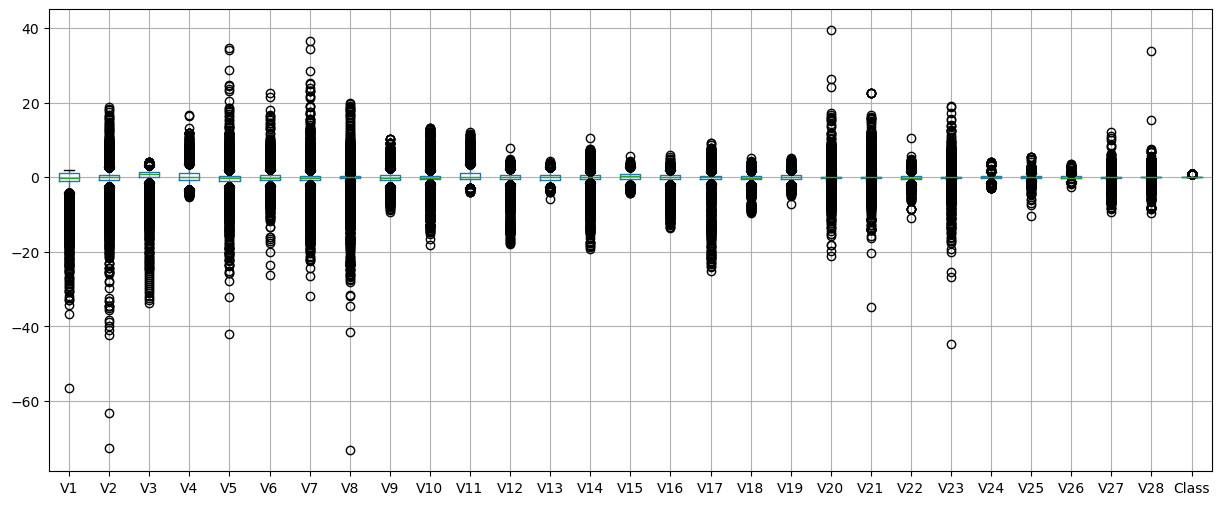

,count,mean,std,min,25%,50%,75%,max
V1,99999.0,-0.262096,1.859057,-56.407510,-1.028101,-0.260556,1.153327,1.960497
V2,99999.0,-0.032374,1.656854,-72.715728,-0.598711,0.078315,0.735736,18.902453
V3,99999.0,0.676251,1.322888,-33.680984,0.176781,0.753991,1.376333,4.226108
V4,99999.0,0.162603,1.349249,-5.172595,-0.711442,0.192567,1.032416,16.715537
V5,99999.0,-0.278507,1.356376,-42.147898,-0.898645,-0.314370,0.249733,34.801666
V6,99999.0,0.094066,1.301356,-26.160506,-0.647870,-0.157022,0.486356,22.529298
V7,99999.0,-0.108712,1.210925,-31.764946,-0.600209,-0.069107,0.414667,36.677268
V8,99999.0,0.056009,1.207528,-73.216718,-0.137457,0.074130,0.360506,20.007208
V9,99999.0,-0.046529,1.121255,-9.283925,-0.698812,-0.119105,0.558226,10.392889
V10,99999.0,-0.023187,1.070409,-18.271168,-0.496342,-0.094927,0.439029,13.249433


In [ ]:
from matplotlib import pyplot as plt

# Check outliers
credit_df.boxplot(figsize = (15,6)) # make boxplot to see outliers
plt.show()
credit_df.describe().T

In [ ]:
print(credit_df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')


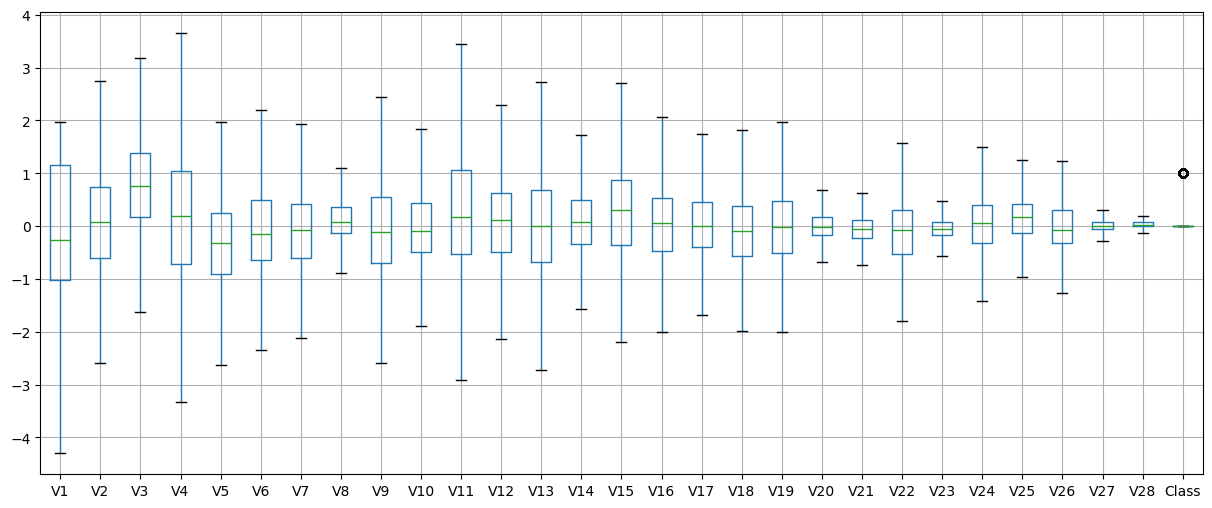

In [ ]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

for outliers in features:
    q1 = credit_df[outliers].quantile(0.25)
    q3 = credit_df[outliers].quantile(0.75)
    iqr = q3 - q1
    credit_df.loc[(credit_df[outliers] < (q1 - 1.5 * iqr)), outliers] = (q1 - 1.5 * iqr)
    credit_df.loc[(credit_df[outliers] > (q3 + 1.5 * iqr)), outliers] = (q3 + 1.5 * iqr)

credit_df.boxplot(figsize = (15,6))
plt.show()

Step 3 - Check Distributions and correlations

In [ ]:
# since there are no categorical features, nothing will be changed

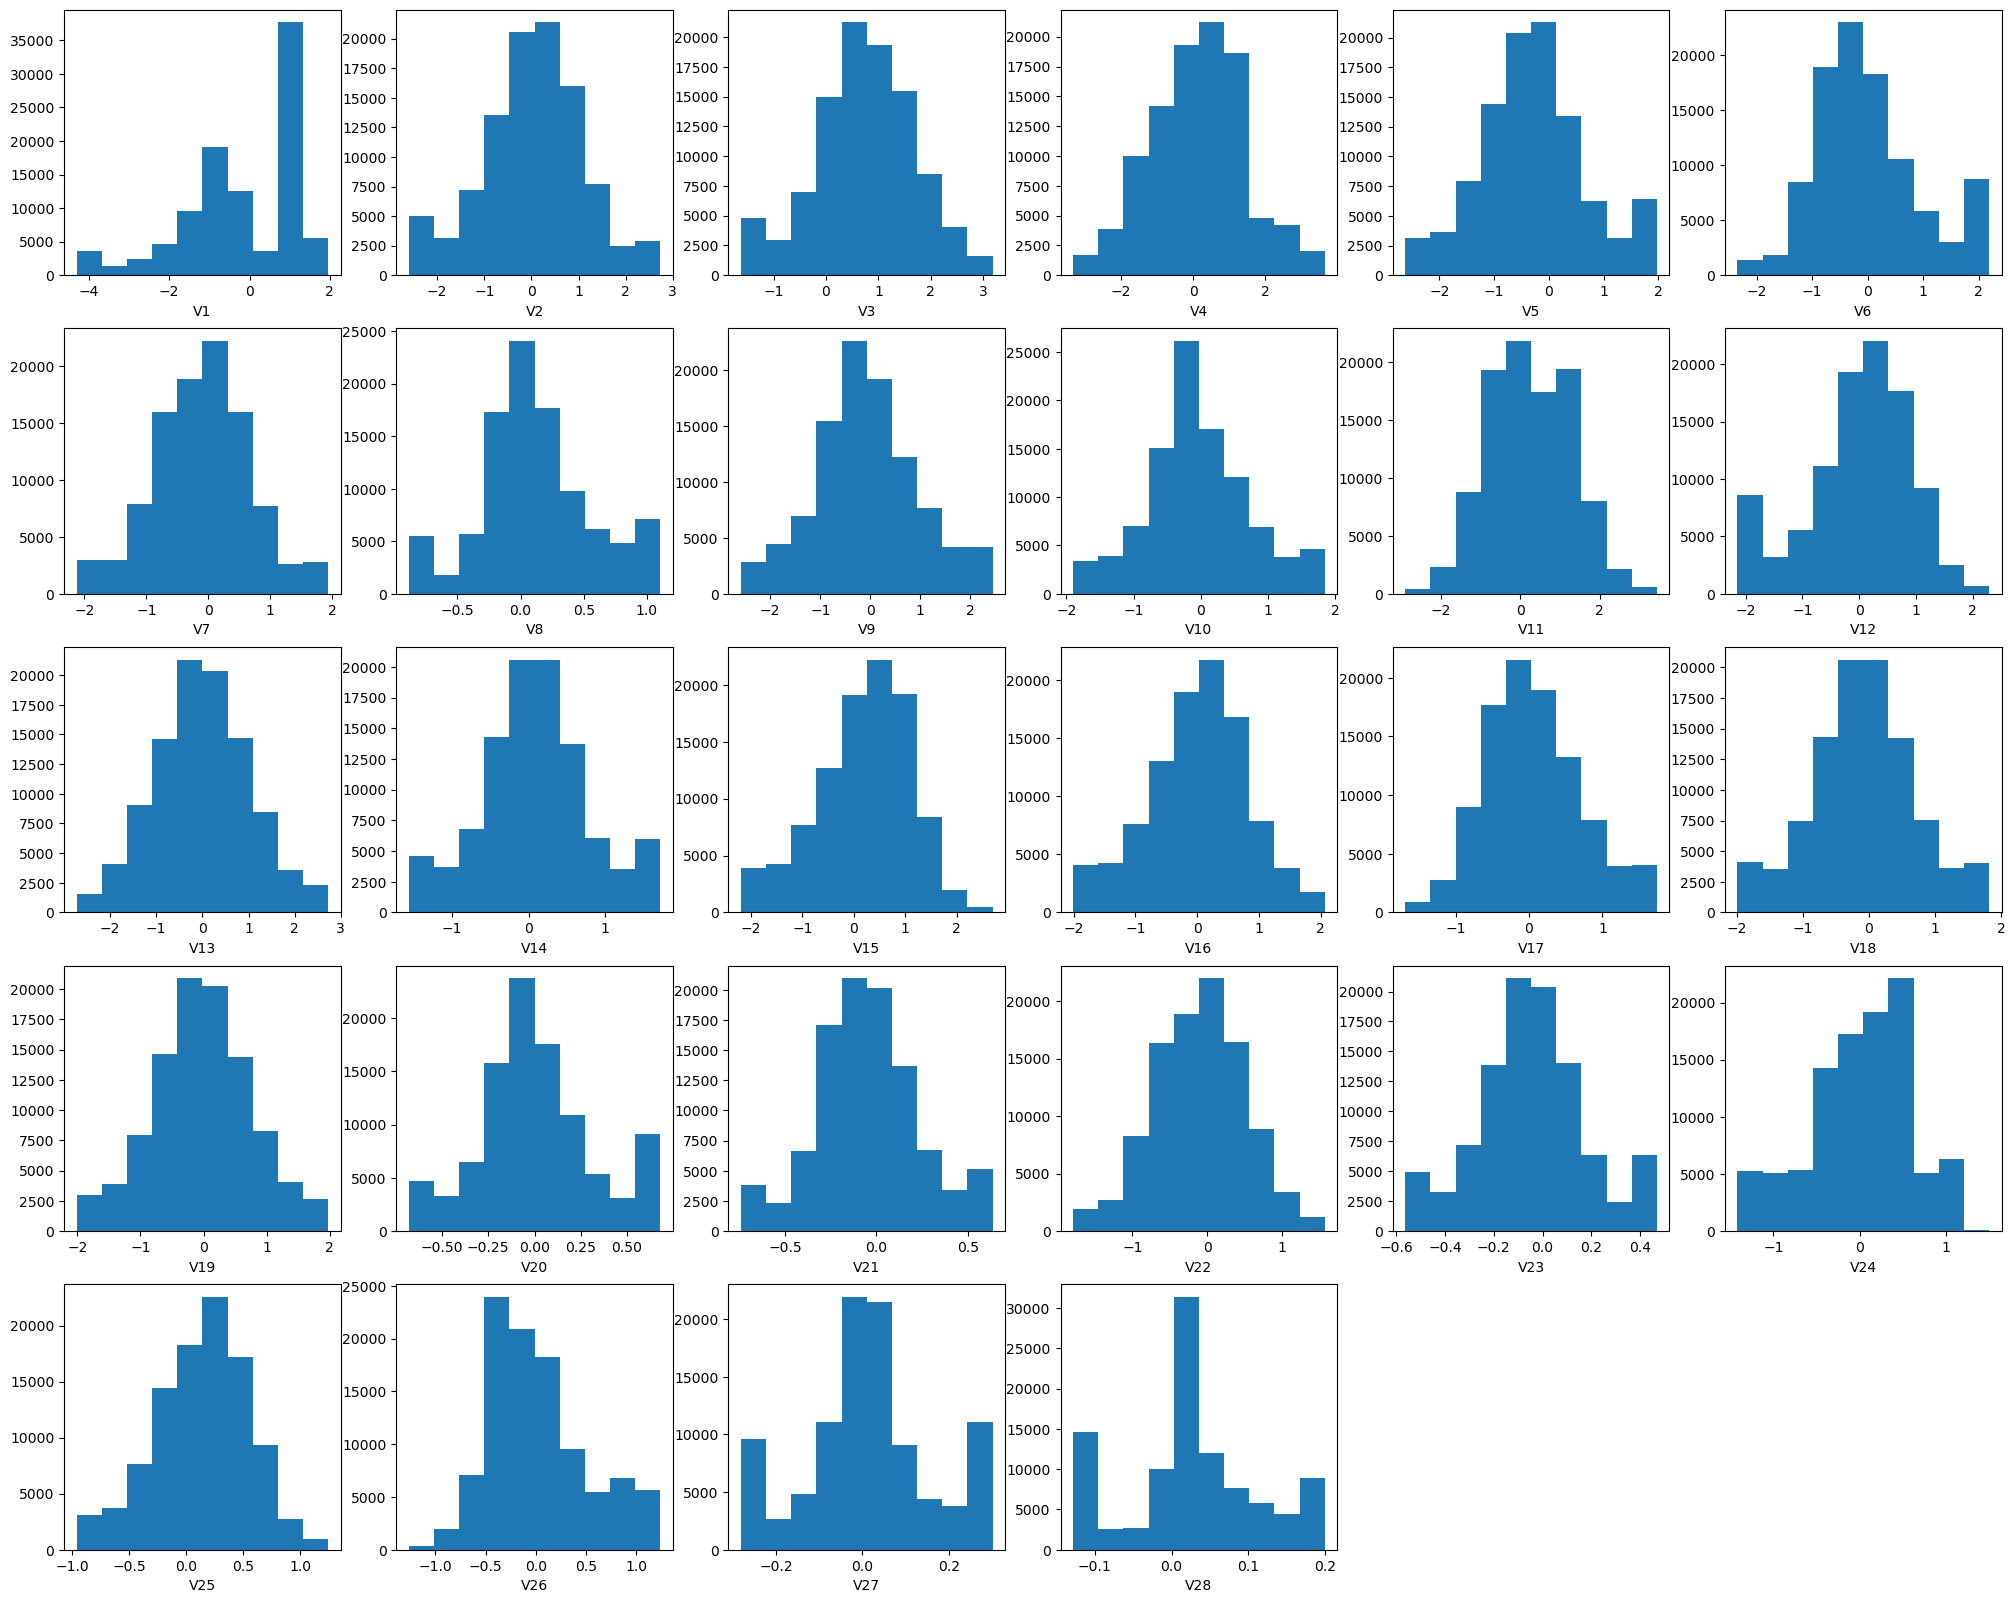

In [ ]:
# Distributions
# In this solution, we are making a plot for each feature
plt.figure(figsize=(25, 20))

plt.subplot(5, 6, 1)
plt.hist(credit_df['V1'])
plt.xlabel('V1')

plt.subplot(5, 6, 2)
plt.hist(credit_df['V2'])
plt.xlabel('V2')

plt.subplot(5, 6, 3)
plt.hist(credit_df['V3'])
plt.xlabel('V3')

plt.subplot(5, 6, 4)
plt.hist(credit_df['V4'])
plt.xlabel('V4')

plt.subplot(5, 6, 5)
plt.hist(credit_df['V5'])
plt.xlabel('V5')

plt.subplot(5, 6, 6)
plt.hist(credit_df['V6'])
plt.xlabel('V6')

plt.subplot(5, 6, 7)
plt.hist(credit_df['V7'])
plt.xlabel('V7')

plt.subplot(5, 6, 8)
plt.hist(credit_df['V8'])
plt.xlabel('V8')

plt.subplot(5, 6, 9)
plt.hist(credit_df['V9'])
plt.xlabel('V9')

plt.subplot(5, 6, 10)
plt.hist(credit_df['V10'])
plt.xlabel('V10')

plt.subplot(5, 6, 11)
plt.hist(credit_df['V11'])
plt.xlabel('V11')

plt.subplot(5, 6, 12)
plt.hist(credit_df['V12'])
plt.xlabel('V12')

plt.subplot(5, 6, 13)
plt.hist(credit_df['V13'])
plt.xlabel('V13')

plt.subplot(5, 6, 14)
plt.hist(credit_df['V14'])
plt.xlabel('V14')

plt.subplot(5, 6, 15)
plt.hist(credit_df['V15'])
plt.xlabel('V15')

plt.subplot(5, 6, 16)
plt.hist(credit_df['V16'])
plt.xlabel('V16')

plt.subplot(5, 6, 17)
plt.hist(credit_df['V17'])
plt.xlabel('V17')

plt.subplot(5, 6, 18)
plt.hist(credit_df['V18'])
plt.xlabel('V18')

plt.subplot(5, 6, 19)
plt.hist(credit_df['V19'])
plt.xlabel('V19')

plt.subplot(5, 6, 20)
plt.hist(credit_df['V20'])
plt.xlabel('V20')

plt.subplot(5, 6, 21)
plt.hist(credit_df['V21'])
plt.xlabel('V21')

plt.subplot(5, 6, 22)
plt.hist(credit_df['V22'])
plt.xlabel('V22')

plt.subplot(5, 6, 23)
plt.hist(credit_df['V23'])
plt.xlabel('V23')

plt.subplot(5, 6, 24)
plt.hist(credit_df['V24'])
plt.xlabel('V24')

plt.subplot(5, 6, 25)
plt.hist(credit_df['V25'])
plt.xlabel('V25')

plt.subplot(5, 6, 26)
plt.hist(credit_df['V26'])
plt.xlabel('V26')

plt.subplot(5, 6, 27)
plt.hist(credit_df['V27'])
plt.xlabel('V27')

plt.subplot(5, 6, 28)
plt.hist(credit_df['V28'])
plt.xlabel('V28')

plt.show()

In [ ]:
credit_df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
V1,1.000000,-0.199245,-0.146979,0.039294,-0.096725,0.006308,-0.152806,-0.134250,-0.009289,0.100657,...,-0.099118,-0.090689,-0.105368,-0.121439,-0.003236,0.306566,0.023440,-0.027264,0.052672,-0.074842
V2,-0.199245,1.000000,0.002930,0.182577,0.227980,-0.079218,0.239149,0.025425,0.003740,-0.061285,...,-0.078736,-0.149309,-0.062504,0.093142,-0.007351,-0.180468,-0.038100,0.129148,-0.027902,0.081828
V3,-0.146979,0.002930,1.000000,0.050061,-0.060549,-0.056153,0.042910,-0.059250,0.107042,-0.023330,...,-0.053713,0.088579,0.285646,0.044980,0.025002,-0.258135,0.035743,0.049749,-0.024652,-0.100505
V4,0.039294,0.182577,0.050061,1.000000,0.029124,0.033176,0.070558,0.018526,0.090623,-0.008219,...,0.015291,0.074408,0.040884,-0.007565,-0.002582,0.004011,-0.028006,0.007459,0.050706,0.104895
V5,-0.096725,0.227980,-0.060549,0.029124,1.000000,0.155260,0.184864,0.078472,-0.006733,-0.070508,...,0.037786,-0.127301,-0.112949,-0.014342,-0.034756,-0.002402,-0.063395,0.032188,-0.042181,-0.056331
V6,0.006308,-0.079218,-0.056153,0.033176,0.155260,1.000000,-0.147834,0.339228,0.075039,0.006835,...,0.049428,0.048884,0.087125,-0.087177,-0.136023,0.033465,0.011497,0.018961,-0.003886,-0.067944
V7,-0.152806,0.239149,0.042910,0.070558,0.184864,-0.147834,1.000000,-0.343581,-0.014336,-0.139765,...,0.147372,-0.055432,-0.072650,-0.020278,-0.008627,-0.167901,-0.055196,-0.112135,-0.024498,-0.085882
V8,-0.134250,0.025425,-0.059250,0.018526,0.078472,0.339228,-0.343581,1.000000,-0.006569,-0.141939,...,-0.010701,0.118165,0.087481,0.070559,-0.012601,-0.064194,0.021473,0.124570,-0.013274,0.043431
V9,-0.009289,0.003740,0.107042,0.090623,-0.006733,0.075039,-0.014336,-0.006569,1.000000,-0.356397,...,0.043499,-0.068310,0.047137,-0.083048,0.011482,0.110552,0.125730,0.000866,-0.046050,-0.076958
V10,0.100657,-0.061285,-0.023330,-0.008219,-0.070508,0.006835,-0.139765,-0.141939,-0.356397,1.000000,...,-0.075269,-0.128798,-0.035881,0.020761,0.001907,-0.012745,-0.037282,-0.000660,-0.050553,-0.098042


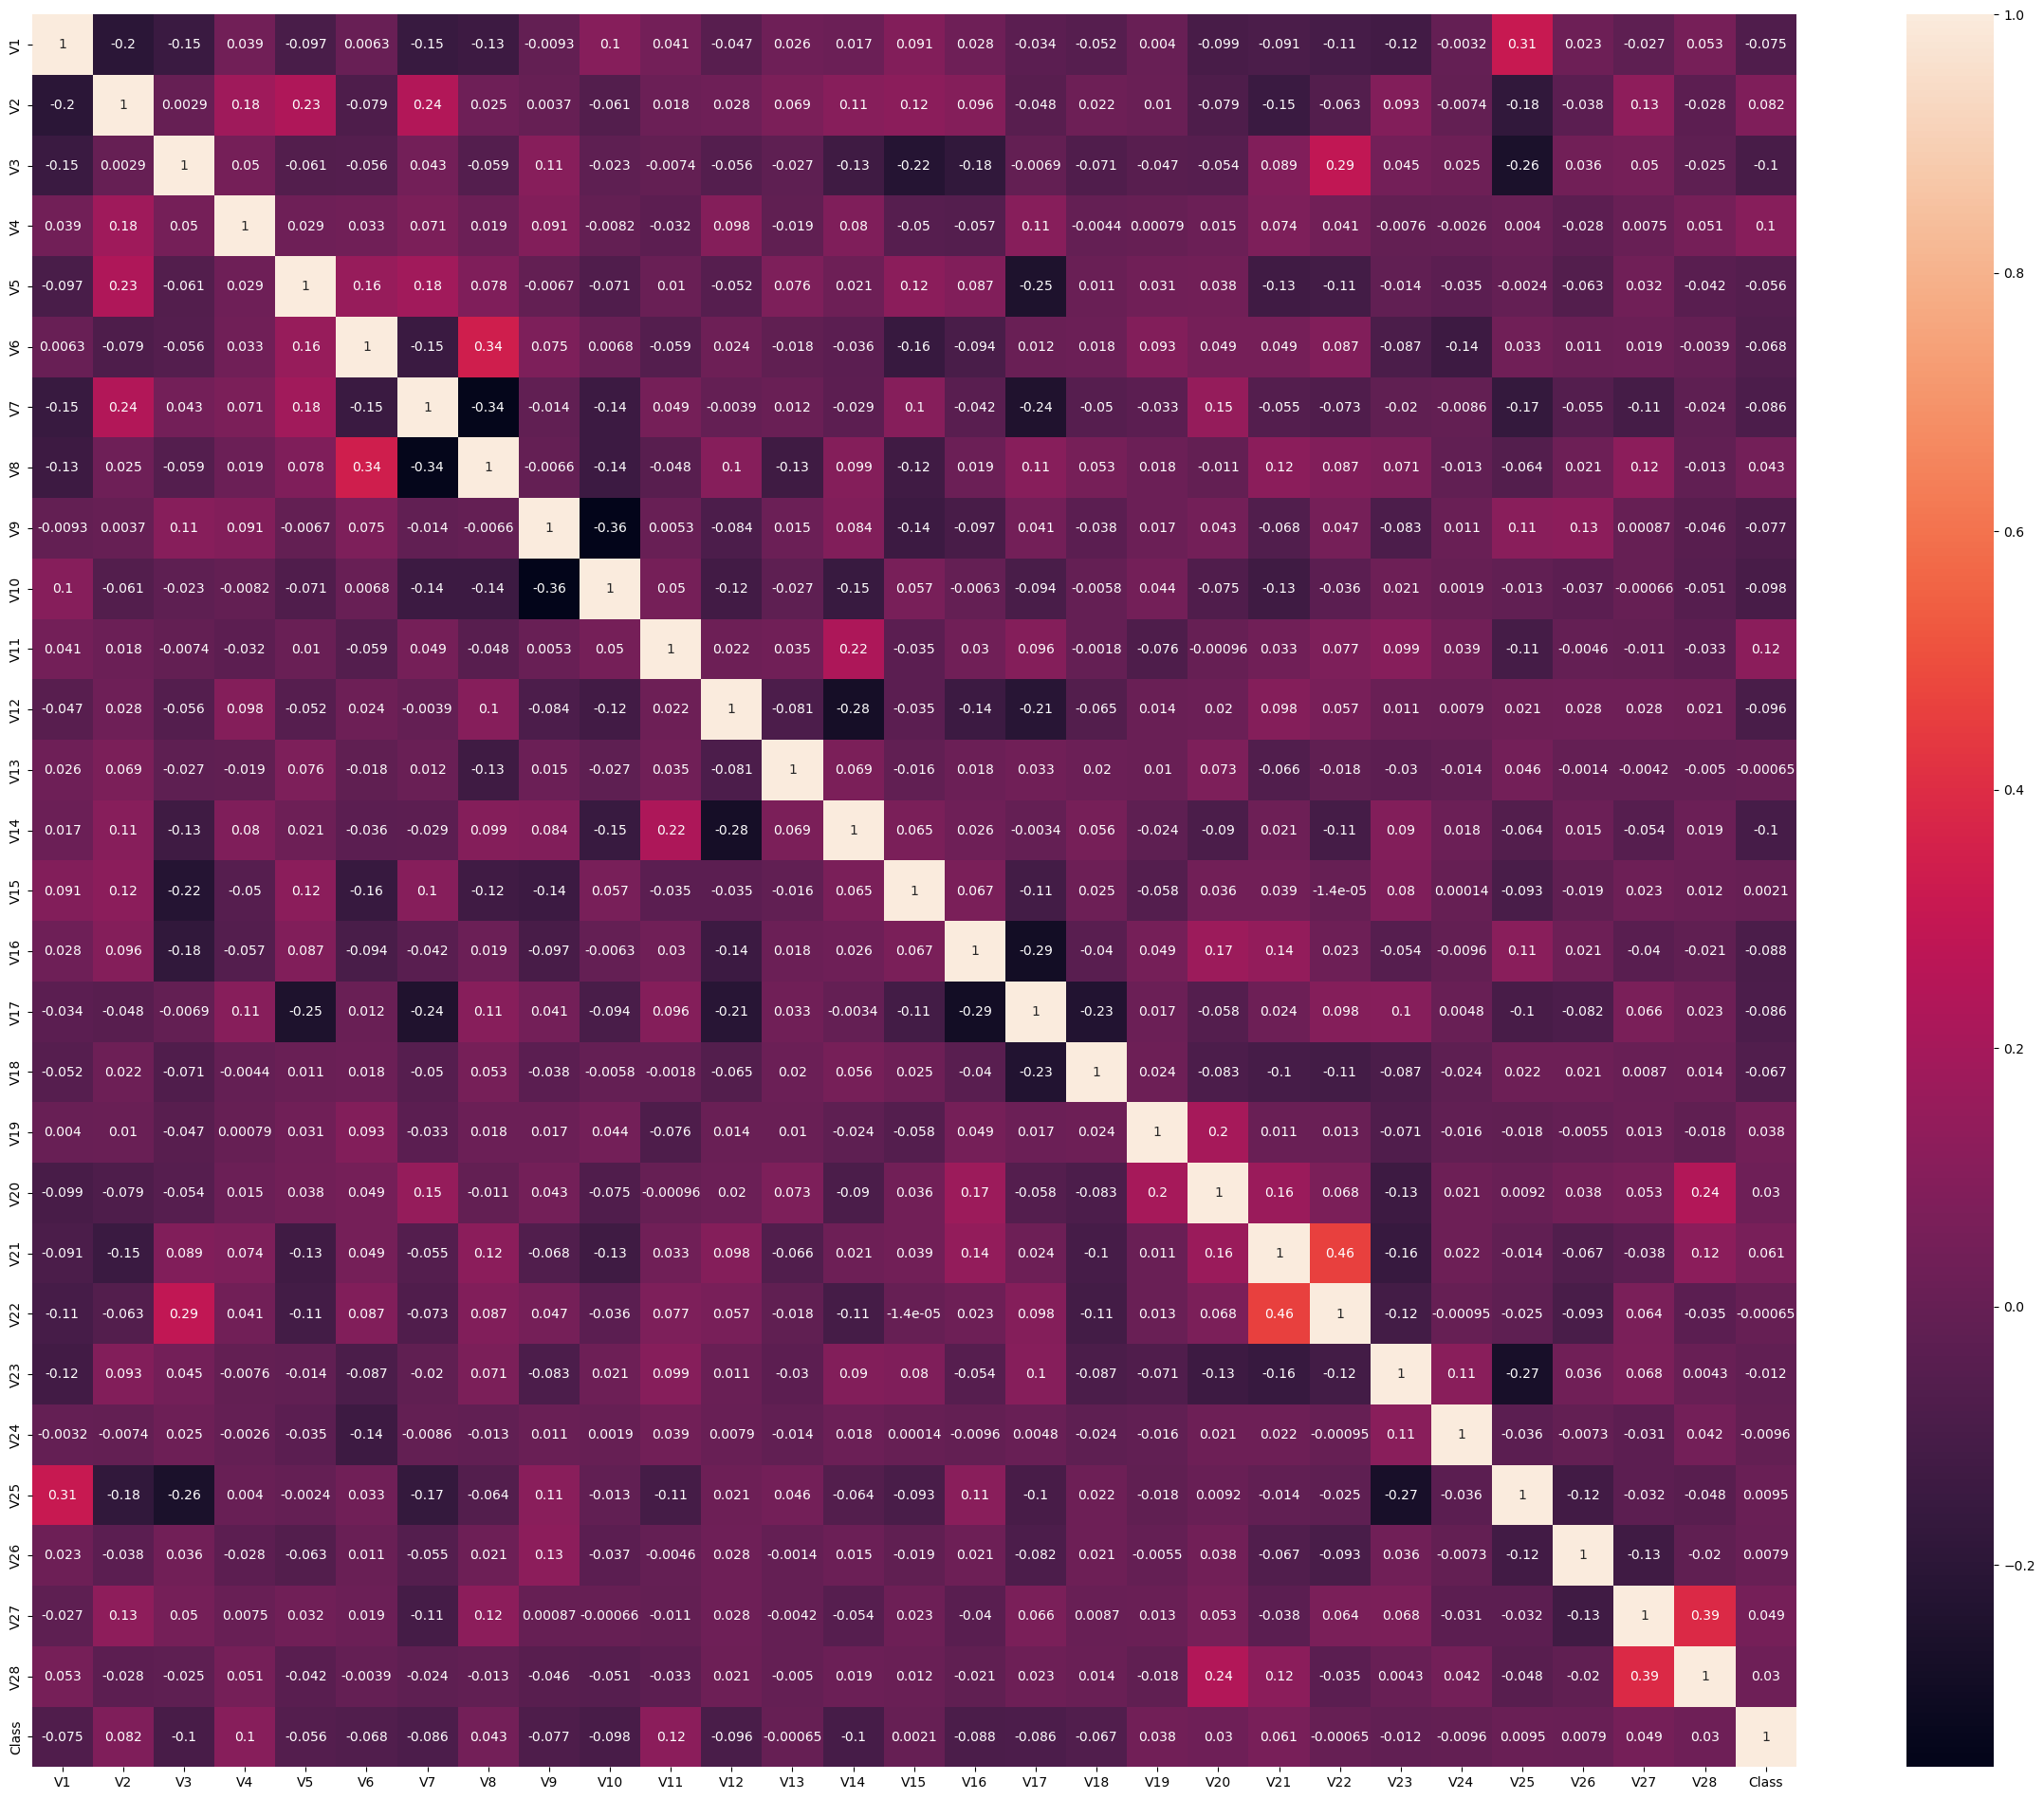

In [ ]:
import seaborn as sns
plt.figure(figsize=(30, 24))
sns.heatmap(credit_df.corr(), annot = True)
plt.show()

In [ ]:
# V11, V4, V2, V21 seem to have the highest correlation with 0.

In [ ]:
# balancing data
credit_df.columns = credit_df.columns.astype(str)

normal_df = credit_df[credit_df['Class'] == 0] [:223]
fraud_df = credit_df[credit_df['Class'] == 1]

print(normal_df)
print(fraud_df)
normal_distributed_df = pd.concat([normal_df, fraud_df])

# Shuffle dataframe rows
bal_df = normal_distributed_df.sample(frac=1, random_state=42)

bal_df.head()

           V1        V2        V3        V4        V5        V6        V7  \
0   -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1    1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
..        ...       ...       ...       ...       ...       ...       ...   
218 -1.032940  0.680608  1.402550 -0.529928  0.869578  1.903301  0.033240   
219  1.122579  0.222573  0.481928  1.131375 -0.214947 -0.201283 -0.056556   
220 -2.420413  1.947885  0.553646  0.983069 -0.281518  2.187695 -1.401613   
221 -2.420413  1.947885  0.553646  0.983069 -0.281518  2.187695 -1.401613   
222 -2.419486  1.949346  0.552998  0.982710 -0.284815  2.187695 -1.398537   

           V8        V9       V10  ...       V20       V21       V22  \
0  

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
15166,-4.300244,2.737407,-1.622546,3.648203,-2.621212,-2.349210,-2.122524,1.107450,-2.584368,-1.899398,...,0.680361,0.634739,-1.251138,-0.396219,0.095706,1.247456,-0.217955,0.301362,0.199452,1
43773,-3.240187,2.737407,-1.622546,3.648203,-2.621212,-0.126271,-2.122524,-0.065331,-2.168366,-1.899398,...,-0.224043,0.634739,0.231910,-0.036490,0.042640,-0.438330,-0.125821,0.301362,0.003146,1
117,-1.024576,0.522289,1.787699,0.202672,-1.140803,-0.137831,-0.336555,0.670704,0.071670,-0.518978,...,-0.278966,0.315868,0.847565,0.148877,0.549791,-0.585131,0.325841,-0.068871,0.059713,0
83053,0.326007,1.286638,-1.622546,2.419675,-1.532902,-1.432803,-2.122524,0.617738,-1.125861,-1.899398,...,0.222667,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.301362,0.199452,1
70,1.006589,-0.071105,0.347614,1.329684,-0.193240,0.155418,0.008574,0.146538,0.103844,0.031830,...,-0.091367,-0.020239,-0.018881,-0.120966,0.027382,0.593864,-0.334688,0.021368,0.015080,0


***ML beginning steps for unbalanced***

Step 1 - Arrange the data into featues and target arrays.

In [ ]:
unbal_X = credit_df.iloc[:, :-1]
unbal_y = credit_df.iloc[:, -1]

print(unbal_X)
print(unbal_y)

             V1        V2        V3        V4        V5        V6        V7  \
0     -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1      1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
...         ...       ...       ...       ...       ...       ...       ...   
99994 -0.228866  0.086431  0.791165 -1.451021  1.141154  0.070110  0.442420   
99995 -1.336121  1.671947  0.994155  0.420318 -0.440923 -0.008386 -0.893860   
99996  0.662465 -1.336560  0.791566  0.425701 -1.391976  0.145471 -0.476652   
99997 -4.300244 -1.090715  0.298037  1.890524 -1.058087 -0.329315 -1.498278   
99998  0.982019 -0.161026  0.534280  0.714558  0.108865  1.154723 -0.298831   

             V8        V9       V10  ...       V19 

Step 2 - Split data into a training set and test set

In [ ]:
# Splitting data into 70% training and 30% test data
# since there are 99999 samples, the training data should be 69999 samples
# the test data should be 30000 samples
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    unbal_X, unbal_y, test_size=0.3, random_state=1, stratify=unbal_y)

print('Labels count in y:', np.bincount(unbal_y)) # total number of each transactions
print('Labels count in y_train:', np.bincount(y_train)) # the number of each transactions in the training data
print('Labels count in y_test:', np.bincount(y_test)) # number of each transactions in test data

Labels count in y: [99776   223]
Labels count in y_train: [69843   156]
Labels count in y_test: [29933    67]


***2. Unbalanced dataset and DT***

Step 3 - Select the ML algorithm, and its parameteters

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# selecting which ML algorithm we will use, we are using decision tree and gini impurity
# and defining it as tree_model
tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=1) # replicate it

Step 4 - Build the model (.fit)

In [ ]:
tree_model.fit(X_train, y_train) # trained model
                                 # using the variable defined above and using X_train
                                 # and y_train which is the training data

DecisionTreeClassifier(max_depth=4, random_state=1)

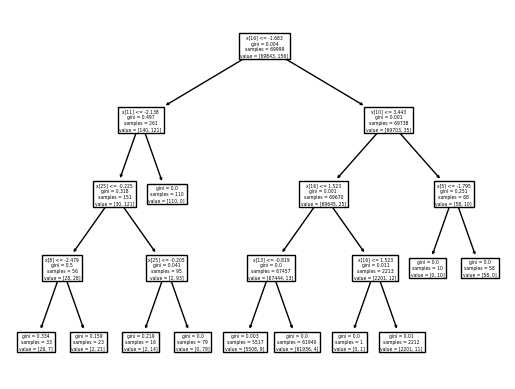

In [ ]:
from sklearn import tree

tree.plot_tree(tree_model) # making a decision tree based of the tree_model from earlier
plt.show()

Step 5 - Apply the model to the test data (.predict)

In [ ]:
from sklearn import metrics
# using tree_model(the trained decision tree model), and the X-test values
# it will use .predict to find the predicted variables values
y_pred = tree_model.predict(X_test)

Step 6 - Estimate performance (accuracy score)

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))
# taking the y_test values from the test dataset and
# the y_pred values and calculating the accuracy of correctly classified samples
# this means the model accuracy is

0.9991666666666666


Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score
from sklearn.model_selection import KFold

y_pred = tree_model.predict(X_test)

# printing classification report
print('Classification Report: Unbalanced Decision Tree \n',classification_report(y_test,y_pred))

train_probas = tree_model.predict_proba(X_train)[:, 1]
train_roc_auc_score = roc_auc_score(y_train, train_probas)
test_probas = tree_model.predict_proba(X_test)[:, 1]
test_roc_auc_score = roc_auc_score(y_test, test_probas)

# printing accuracies and training scores
print('Training accuracy score: %.3f' % tree_model.score(X_train, y_train))
print('ROC-AUC training Score: %.3f'% train_roc_auc_score)
print('Test accuracy score: %.3f'% tree_model.score(X_test, y_test))
print('ROC-AUC test Score: %.3f'% test_roc_auc_score)

# printing confusion matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test,y_pred))

# printing other stats
print('\nAccuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

# k-fold cross-validation
kf = KFold(n_splits=10, shuffle = True)
scores = []
for i, (train_index, val_index) in enumerate(kf.split(unbal_X)):
    X_train, X_val = unbal_X.iloc[train_index, :], unbal_X.iloc[val_index, :]
    y_train, y_val = unbal_y.iloc[train_index], unbal_y.iloc[val_index]
    tree_model.fit(X_train, y_train)
    score = tree_model.score(X_val, y_val)
    y_pred = tree_model.predict(X_val)

    scores.append(score)

print('\nk-fold crossvalidation Average: ', np.mean(scores))

Classification Report: Unbalanced Decision Tree 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29933
           1       0.83      0.79      0.81        67

    accuracy                           1.00     30000
   macro avg       0.91      0.90      0.90     30000
weighted avg       1.00      1.00      1.00     30000

Training accuracy score: 0.999
ROC-AUC training Score: 0.981
Test accuracy score: 0.999
ROC-AUC test Score: 0.956

Confusion Matrix:
 [[29922    11]
 [   14    53]]

Accuracy: 0.999
Precision: 0.828
Recall: 0.791
F1: 0.809

k-fold crossvalidation Average:  0.9992999889988999


***3. Unbalanced dataset and kNN***

Step 3 - Select the ML algorithm, and its parameteters

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# all parameters for this is set to default
knn = KNeighborsClassifier(n_neighbors=5, # telling what the nearest neighbors the model should look at
                           p=2, # using euclidean distance to calculate distance between points
                           metric='minkowski') # specifiying the distance metric

Step 4 - Build the model (.fit)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# using standardScaler()
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [ ]:
# using Normalizer()
norm_scaler = Normalizer().fit(X_train) # the scaler is fitted to the training set
X_train_normal= norm_scaler.transform(X_train) # the scaler is applied to the training set
X_test_normal = norm_scaler.transform(X_test) # the scaler is applied to the test set

knn.fit(X_train_normal, y_train)

KNeighborsClassifier()

Step 5 - Apply the model to the test data (.predict)

In [ ]:
from sklearn import metrics
y_pred_std = knn.predict(X_test_std)
y_pred_norm = knn.predict(X_test_normal)

Step 6 - Estimate performance (accuracy score)

In [ ]:
print("using standardScaler() = ", metrics.accuracy_score(y_test, y_pred_std))
print("using Normalizer() =",  metrics.accuracy_score(y_test, y_pred_norm))

# below is the baseline accuracy for the kNN model, it seems both yield the same accuracy

using standardScaler() =  0.9993666666666666
using Normalizer() = 0.9994666666666666


Classification Report

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

# using standardize since results from above showed both were the same accuracy
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

knn.fit(X_train_std, y_train)
y_pred_std = knn.predict(X_test_std)

# printing classification report
print('Classification Report: Unbalanced kNN\n', classification_report(y_test, y_pred_std))

# printing accuracies and training scores
train_probas = knn.predict_proba(X_train_std)[:, 1]
train_roc_auc_score = roc_auc_score(y_train, train_probas)
test_probas = knn.predict_proba(X_test_std)[:, 1]
test_roc_auc_score = roc_auc_score(y_test, test_probas)

print('Training accuracy score: %.3f' % knn.score(X_train_std, y_train))
print('ROC-AUC training Score: %.3f' % train_roc_auc_score)
print('Test accuracy score: %.3f' % knn.score(X_test_std, y_test))
print('ROC-AUC test Score: %.3f' % test_roc_auc_score)

# printing confusion matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_std))

# printing other stats
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred_std))
print('Precision: %.3f' % precision_score(y_test, y_pred_std))
print('Recall: %.3f' % recall_score(y_test, y_pred_std))
print('F1: %.3f' % f1_score(y_test, y_pred_std))

# k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True)
scores = []
for train_index, val_index in kf.split(X_train_std):
    X_train_fold, X_val_fold = X_train_std[train_index], X_train_std[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    knn.fit(X_train_fold, y_train_fold)
    score = knn.score(X_val_fold, y_val_fold)
    scores.append(score)

print('\nk-fold cross-validation Average: ', np.mean(scores))

Classification Report: Unbalanced kNN
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29933
           1       0.89      0.87      0.88        67

    accuracy                           1.00     30000
   macro avg       0.95      0.93      0.94     30000
weighted avg       1.00      1.00      1.00     30000

Training accuracy score: 1.000
ROC-AUC training Score: 1.000
Test accuracy score: 0.999
ROC-AUC test Score: 0.992

Confusion Matrix:
 [[29926     7]
 [    9    58]]

Accuracy: 0.999
Precision: 0.892
Recall: 0.866
F1: 0.879

k-fold cross-validation Average:  0.9994333333333334


***4. Unbalanced dataset and SVM***

Step 3 - Select the ML algorithm, and its parameteters

In [ ]:
#testing for linear all features
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', probability=True)

Step 4 - Build the model (.fit)

In [ ]:
svm_linear.fit(X_train_std, y_train)

SVC(kernel='linear', probability=True)

Step 5 - Apply the model to the test data (.predict)

In [ ]:
y_pred_linear = svm_linear.predict(X_test_std)

Step 6 - Estimate performance (accuracy score)

In [ ]:
print(metrics.accuracy_score(y_test, y_pred_linear))

0.9991333333333333


In [ ]:
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train_std, y_train)
y_pred_rbf = svm_rbf.predict(X_test_std)
print(metrics.accuracy_score(y_test, y_pred_rbf))

# since both accuracies are the same, I decided to use linear for the rest of the problem

0.9995


Classification Report

In [ ]:
print('Classification Report: Unbalanced SVM\n', classification_report(y_test, y_pred_std))

train_probas = svm_linear.predict_proba(X_train_std)[:, 1]
train_roc_auc_score = roc_auc_score(y_train, train_probas)
test_probas = svm_linear.predict_proba(X_test_std)[:, 1]
test_roc_auc_score = roc_auc_score(y_test, test_probas)
print('Training accuracy score: %.3f' % svm_linear.score(X_train_std, y_train))
print('ROC-AUC training Score: %.3f' % train_roc_auc_score)
print('Test accuracy score: %.3f' % svm_linear.score(X_test_std, y_test))
print('ROC-AUC test Score: %.3f' % test_roc_auc_score)

print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_std))

print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred_std))
print('Precision: %.3f' % precision_score(y_test, y_pred_std))
print('Recall: %.3f' % recall_score(y_test, y_pred_std))
print('F1: %.3f' % f1_score(y_test, y_pred_std))

kf = KFold(n_splits=10, shuffle=True)
scores = []
for train_index, val_index in kf.split(X_train_std):
    X_train_fold, X_val_fold = X_train_std[train_index], X_train_std[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    svm_linear.fit(X_train_fold, y_train_fold)
    score = svm_linear.score(X_val_fold, y_val_fold)
    scores.append(score)

print('\nk-fold cross-validation Average: ', np.mean(scores))

Classification Report: Unbalanced SVM
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29933
           1       0.89      0.87      0.88        67

    accuracy                           1.00     30000
   macro avg       0.95      0.93      0.94     30000
weighted avg       1.00      1.00      1.00     30000

Training accuracy score: 0.999
ROC-AUC training Score: 0.970
Test accuracy score: 0.999
ROC-AUC test Score: 0.971

Confusion Matrix:
 [[29926     7]
 [    9    58]]

Accuracy: 0.999
Precision: 0.892
Recall: 0.866
F1: 0.879

k-fold cross-validation Average:  0.9991888888888889


***ML beginning steps for balanced***

Step 1 - Arrange the data into featues and target arrays.

In [ ]:
bal_X = bal_df.iloc[:, :-1]
bal_y = bal_df.iloc[:, -1]

print(bal_X)
print(bal_y)

             V1        V2        V3        V4        V5        V6        V7  \
15166 -4.300244  2.737407 -1.622546  3.648203 -2.621212 -2.349210 -2.122524   
43773 -3.240187  2.737407 -1.622546  3.648203 -2.621212 -0.126271 -2.122524   
117   -1.024576  0.522289  1.787699  0.202672 -1.140803 -0.137831 -0.336555   
83053  0.326007  1.286638 -1.622546  2.419675 -1.532902 -1.432803 -2.122524   
70     1.006589 -0.071105  0.347614  1.329684 -0.193240  0.155418  0.008574   
...         ...       ...       ...       ...       ...       ...       ...   
106   -0.426072 -0.060304  2.220828  0.024742 -0.584964  0.460623 -0.322526   
10897 -4.300244  2.737407 -1.622546  3.648203 -2.621212 -2.120937 -2.122524   
42887 -4.300244  2.737407 -1.622546  3.648203 -2.621212 -2.349210 -2.122524   
92777 -4.300244  2.737407 -1.622546  3.258845 -2.621212 -0.637328 -2.122524   
102    0.298503  2.142722 -1.542143  1.561332  0.938108 -2.145673  1.405569   

             V8        V9       V10  ...       V19 

Step 2 - Split data into a training set and test set

In [ ]:
# Splitting data into 70% training and 30% test data
# since there are 446 samples, the training data should be 312 samples
# the test data should be 134 samples, but we will use the original unbalanced dataset for testing.
from sklearn.model_selection import train_test_split
import numpy as np

bal_X_train, bal_X_test, bal_y_train, bal_y_test = train_test_split(
    bal_X, bal_y, test_size=0.3, random_state=1, stratify=bal_y)

print('Labels count in y:', np.bincount(bal_y)) # total number of each transactions
print('Labels count in y_train:', np.bincount(bal_y_train)) # the number of each transactions in the training data
print('Labels count in y_test:', np.bincount(bal_y_test))

Labels count in y: [223 223]
Labels count in y_train: [156 156]
Labels count in y_test: [67 67]


***5. Balanced dataset and DT.***

In [ ]:
bal_tree = DecisionTreeClassifier(
                                    criterion='gini',
                                    max_depth=4,
                                    random_state=1)
bal_tree.fit(bal_X_train, bal_y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [ ]:
# using the original unbalanced dataset for testing but using
# the model we trained using the balanced dataset
bal_tree_y_pred = bal_tree.predict(X_test)
print(metrics.accuracy_score(y_test, bal_tree_y_pred))

0.7941666666666667


Classifcation Report

In [ ]:
print('Classification Report: Balanced Decision Tree \n', classification_report(y_test, bal_tree_y_pred))

train_probas = bal_tree.predict_proba(bal_X_train)[:, 1]
train_roc_auc_score = roc_auc_score(bal_y_train, train_probas)
test_probas = bal_tree.predict_proba(X_test)[:, 1]
test_roc_auc_score = roc_auc_score(y_test, test_probas)

print('Training accuracy score: %.3f' % bal_tree.score(bal_X_train, bal_y_train))
print('ROC-AUC training Score: %.3f' % train_roc_auc_score)
print('Test accuracy score: %.3f' % bal_tree.score(X_test, y_test))
print('ROC-AUC test Score: %.3f' % test_roc_auc_score)

print('\nConfusion Matrix:\n', confusion_matrix(y_test, bal_tree_y_pred))

print('\nAccuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=bal_tree_y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=bal_tree_y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=bal_tree_y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=bal_tree_y_pred))

kf = KFold(n_splits=10, shuffle=True)
scores = []
for train_index, val_index in kf.split(bal_X):
    X_train_fold, X_val_fold = bal_X.iloc[train_index], bal_X.iloc[val_index]
    y_train_fold, y_val_fold = bal_y.iloc[train_index], bal_y.iloc[val_index]
    bal_tree.fit(X_train_fold, y_train_fold)
    score = bal_tree.score(X_val_fold, y_val_fold)
    scores.append(score)

print('\nk-fold cross-validation Average: ', np.mean(scores))

Classification Report: Balanced Decision Tree 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88     29933
           1       0.01      0.97      0.02        67

    accuracy                           0.79     30000
   macro avg       0.51      0.88      0.45     30000
weighted avg       1.00      0.79      0.88     30000

Training accuracy score: 0.994
ROC-AUC training Score: 0.994
Test accuracy score: 0.794
ROC-AUC test Score: 0.883

Confusion Matrix:
 [[23760  6173]
 [    2    65]]

Accuracy: 0.794
Precision: 0.010
Recall: 0.970
F1: 0.021

k-fold cross-validation Average:  0.9596969696969697


***6. Balanced dataset and kNN***

In [ ]:
std_scaler_knn = StandardScaler()
bal_X_train_std_knn = std_scaler_knn.fit_transform(bal_X_train)
X_test_std_knn = std_scaler_knn.transform(X_test)

norm_scaler_knn = Normalizer().fit(bal_X_train)
bal_X_train_norm_knn = norm_scaler_knn.transform(bal_X_train)
X_test_norm_knn = norm_scaler_knn.transform(X_test)

knn.fit(bal_X_train_std_knn, bal_y_train)
y_pred_knn_std = knn.predict(X_test_std_knn)

knn.fit(bal_X_train_norm_knn, bal_y_train)
y_pred_knn_norm = knn.predict(X_test_norm_knn)


print('Accuracy using StandardScaler:', metrics.accuracy_score(y_test, y_pred_knn_std))
print('Accuracy using Normalizer:', metrics.accuracy_score(y_test, y_pred_knn_norm))

# since the accuracy score for standard is higher, I will use that for the rest of the problem

Accuracy using StandardScaler: 0.9801
Accuracy using Normalizer: 0.9194666666666667


Classification Report

In [ ]:
print('Classification Report: Balanced kNN\n', classification_report(y_test, y_pred_knn_std))

# Calculate probabilities and ROC-AUC scores
train_probas = knn.predict_proba(bal_X_train_std_knn)[:, 1]
train_roc_auc_score = roc_auc_score(bal_y_train, train_probas)
test_probas = knn.predict_proba(X_test_std)[:, 1]
test_roc_auc_score = roc_auc_score(y_test, test_probas)

# Print accuracies and scores
print('Training accuracy score: %.3f' % knn.score(bal_X_train_std_knn, bal_y_train))
print('ROC-AUC training Score: %.3f' % train_roc_auc_score)
print('Test accuracy score: %.3f' % knn.score(X_test_std_knn, y_test))
print('ROC-AUC test Score: %.3f' % test_roc_auc_score)

# Print confusion matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_knn_std))

# Print other stats
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred_knn_std))
print('Precision: %.3f' % precision_score(y_test, y_pred_knn_std))
print('Recall: %.3f' % recall_score(y_test, y_pred_knn_std))
print('F1: %.3f' % f1_score(y_test, y_pred_knn_std))

# Perform k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True)
scores = []
for train_index, val_index in kf.split(bal_X_train_std_knn):
    X_train_fold, X_val_fold = bal_X_train_std_knn[train_index], bal_X_train_std_knn[val_index]
    y_train_fold, y_val_fold = bal_y_train.iloc[train_index], bal_y_train.iloc[val_index]
    knn.fit(X_train_fold, y_train_fold)
    score = knn.score(X_val_fold, y_val_fold)
    scores.append(score)

print('\nk-fold cross-validation Average: ', np.mean(scores))

Classification Report: Balanced kNN
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     29933
           1       0.09      0.93      0.17        67

    accuracy                           0.98     30000
   macro avg       0.55      0.95      0.58     30000
weighted avg       1.00      0.98      0.99     30000

Training accuracy score: 0.965
ROC-AUC training Score: 0.996
Test accuracy score: 0.952
ROC-AUC test Score: 0.973

Confusion Matrix:
 [[29341   592]
 [    5    62]]

Accuracy: 0.980
Precision: 0.095
Recall: 0.925
F1: 0.172

k-fold cross-validation Average:  0.9452620967741936


***7. Balanced dataset and SVM***

In [ ]:
svm_classifier_linear = SVC(kernel='linear', probability=True)
svm_classifier_rbf = SVC(kernel='rbf', probability=True)

std_scaler_svm = StandardScaler()
bal_X_train_std_svm = std_scaler_svm.fit_transform(bal_X_train)
X_test_std_svm = std_scaler_svm.transform(X_test)

svm_classifier_linear.fit(bal_X_train_std_svm, bal_y_train)
y_pred_svm_linear = svm_classifier_linear.predict(X_test_std_svm)
print('Accuracy using linear svc:',metrics.accuracy_score(y_test, y_pred_svm_linear))

svm_classifier_rbf.fit(bal_X_train_std_svm, bal_y_train)
y_pred_svm_rbf = svm_classifier_rbf.predict(X_test_std_svm)
print('Accuracy using rbf svc:', metrics.accuracy_score(y_test, y_pred_svm_rbf))

# since the higher accuracy is rbf, I will use it for the classification report and the rest of the problems

Accuracy using linear svc: 0.8814666666666666
Accuracy using rbf svc: 0.9775666666666667


Classification Report

In [ ]:
print('Classification Report: Balanced SVM\n', classification_report(y_test, y_pred_svm_rbf))

# Calculate probabilities and ROC-AUC scores
train_probas = svm_rbf.predict_proba(bal_X_train_std_svm)[:, 1]
train_roc_auc_score = roc_auc_score(bal_y_train, train_probas)
test_probas = svm_rbf.predict_proba(X_test_std)[:, 1]
test_roc_auc_score = roc_auc_score(y_test, test_probas)

# Print accuracies and scores
print('Training accuracy score: %.3f' % svm_rbf.score(bal_X_train_std_svm, bal_y_train))
print('ROC-AUC training Score: %.3f' % train_roc_auc_score)
print('Test accuracy score: %.3f' % svm_rbf.score(X_test_std, y_test))
print('ROC-AUC test Score: %.3f' % test_roc_auc_score)

# Print confusion matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_svm_rbf))

# Print other stats
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred_svm_rbf))
print('Precision: %.3f' % precision_score(y_test, y_pred_svm_rbf))
print('Recall: %.3f' % recall_score(y_test, y_pred_svm_rbf))
print('F1: %.3f' % f1_score(y_test, y_pred_svm_rbf))

# Perform k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True)
scores = []
for train_index, val_index in kf.split(bal_X_train_std_svm):
    X_train_fold, X_val_fold = bal_X_train_std_svm[train_index], bal_X_train_std_svm[val_index]
    y_train_fold, y_val_fold = bal_y_train.iloc[train_index], bal_y_train.iloc[val_index]
    svm_rbf.fit(X_train_fold, y_train_fold)
    score = svm_rbf.score(X_val_fold, y_val_fold)
    scores.append(score)

print('\nk-fold cross-validation Average: ', np.mean(scores))

Classification Report: Balanced SVM
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     29933
           1       0.09      0.96      0.16        67

    accuracy                           0.98     30000
   macro avg       0.54      0.97      0.57     30000
weighted avg       1.00      0.98      0.99     30000

Training accuracy score: 0.676
ROC-AUC training Score: 0.978
Test accuracy score: 1.000
ROC-AUC test Score: 0.999

Confusion Matrix:
 [[29263   670]
 [    3    64]]

Accuracy: 0.978
Precision: 0.087
Recall: 0.955
F1: 0.160

k-fold cross-validation Average:  0.9519153225806452


***8. Create Learning Curves for DT, kNN and SVM***

DT Learning Curve

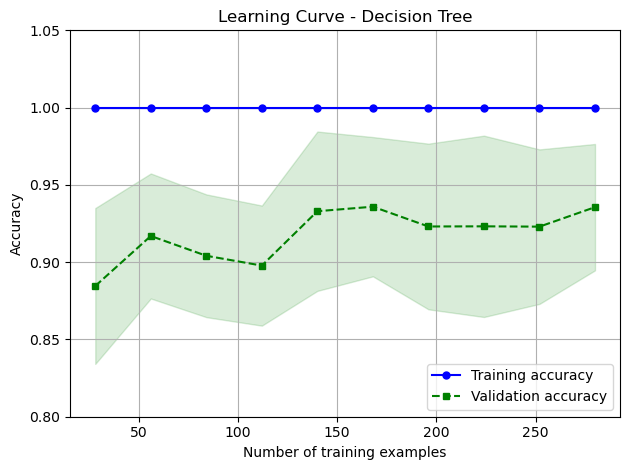

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

pipe_dt = make_pipeline(DecisionTreeClassifier())

train_sizes, train_scores, test_scores =\
    learning_curve(estimator=pipe_dt,
                   X=bal_X_train,
                   y=bal_y_train,
                   train_sizes=np.linspace(0.1, 1.0, 10),
                   cv=10,
                   n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Learning Curve - Decision Tree")
plt.ylim([0.8, 1.05])
plt.tight_layout()
plt.show()

kNN Learning Curve

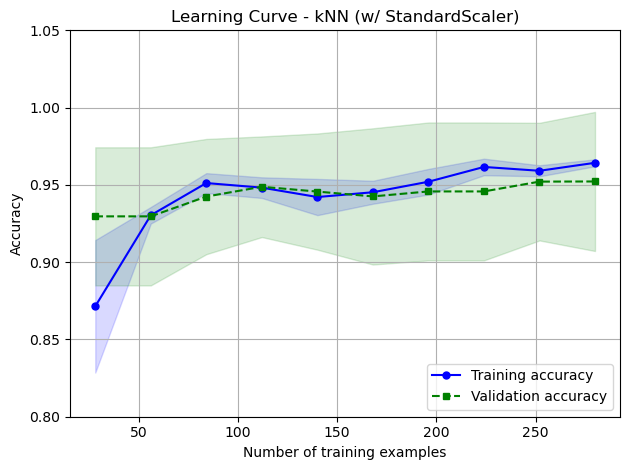

In [ ]:
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

train_sizes, train_scores, test_scores =\
    learning_curve(estimator=pipe_knn,
                   X=bal_X_train,
                   y=bal_y_train,
                   train_sizes=np.linspace(0.1, 1.0, 10),
                   cv=10,
                   n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Learning Curve - kNN (w/ StandardScaler)")
plt.ylim([0.8, 1.05])
plt.tight_layout()
plt.show()

SVM Learning Curve

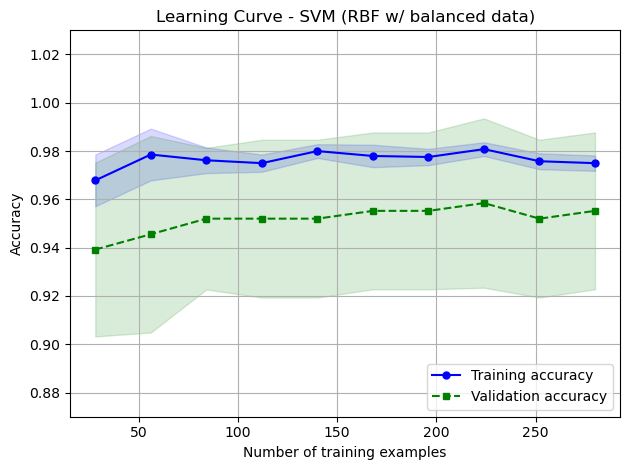

In [ ]:
# Create a pipeline for SVM with balanced dataset
pipe_svm = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

train_sizes, train_scores, test_scores =\
    learning_curve(estimator=pipe_svm,
                   X=bal_X_train,
                   y=bal_y_train,
                   train_sizes=np.linspace(0.1, 1.0, 10),
                   cv=10,
                   n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Learning Curve - SVM (RBF w/ balanced data)")
plt.ylim([0.87, 1.03])
plt.tight_layout()
plt.show()

***9. Perform a Grid Search (with C and gamma = [0.01, 0.1, 1.0, 10.0] and kernel = ['rbf', 'linear']) and produce best score and parameters (optimal parameters for SVC) for Balanced Dataset***

In [ ]:
from sklearn.model_selection import GridSearchCV

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(bal_X_train, bal_y_train)
print('Best score:', gs.best_score_)
print('Best params:', gs.best_params_)

clf = gs.best_estimator_

print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Best score: 0.9648185483870968
Best params: {'svc__C': 0.1, 'svc__kernel': 'linear'}
Test accuracy: 0.963


***10. Create ROC/AUC curve for the optimal SVC***

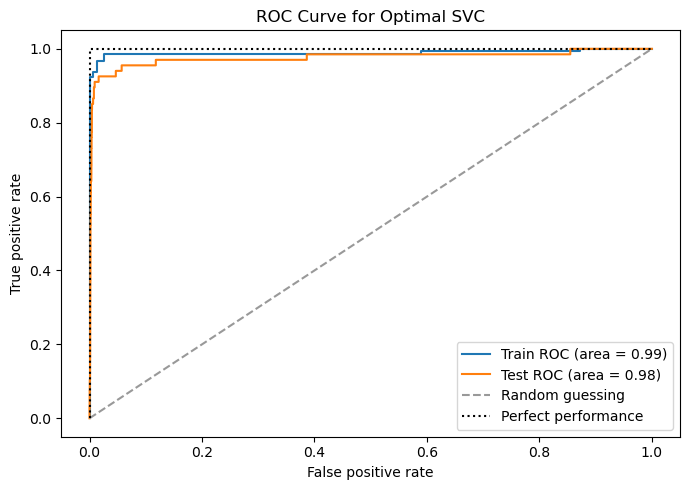

In [ ]:
from sklearn.metrics import roc_curve, auc
# Create a pipeline with StandardScaler and SVC with probability=True
pipe_svc = make_pipeline(StandardScaler(), SVC(C=0.1, kernel='linear', probability=True))

# Fit the pipeline on your balanced training data
pipe_svc.fit(bal_X_train, bal_y_train)

fig = plt.figure(figsize=(7, 5))

# Training ROC Curve
train_scores = pipe_svc.decision_function(bal_X_train)
fpr_train, tpr_train, thresholds_train = roc_curve(bal_y_train, train_scores, pos_label=1)
roc_auc_train = auc(fpr_train, tpr_train)

plt.step(fpr_train, tpr_train, label='Train ROC (area = %0.2f)' % (roc_auc_train))

# Test ROC Curve
test_scores = pipe_svc.decision_function(X_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_scores, pos_label=1)
roc_auc_test = auc(fpr_test, tpr_test)

plt.step(fpr_test, tpr_test, where='post', label='Test ROC (area = %0.2f)' % (roc_auc_test))

plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='Random guessing')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title('ROC Curve for Optimal SVC')

plt.tight_layout()
plt.show()

***11. Analyze the correlation: Which top 4 features coorelate to Genuine transactions and which top 4 features coorrelate to Fraudulent transactions?***

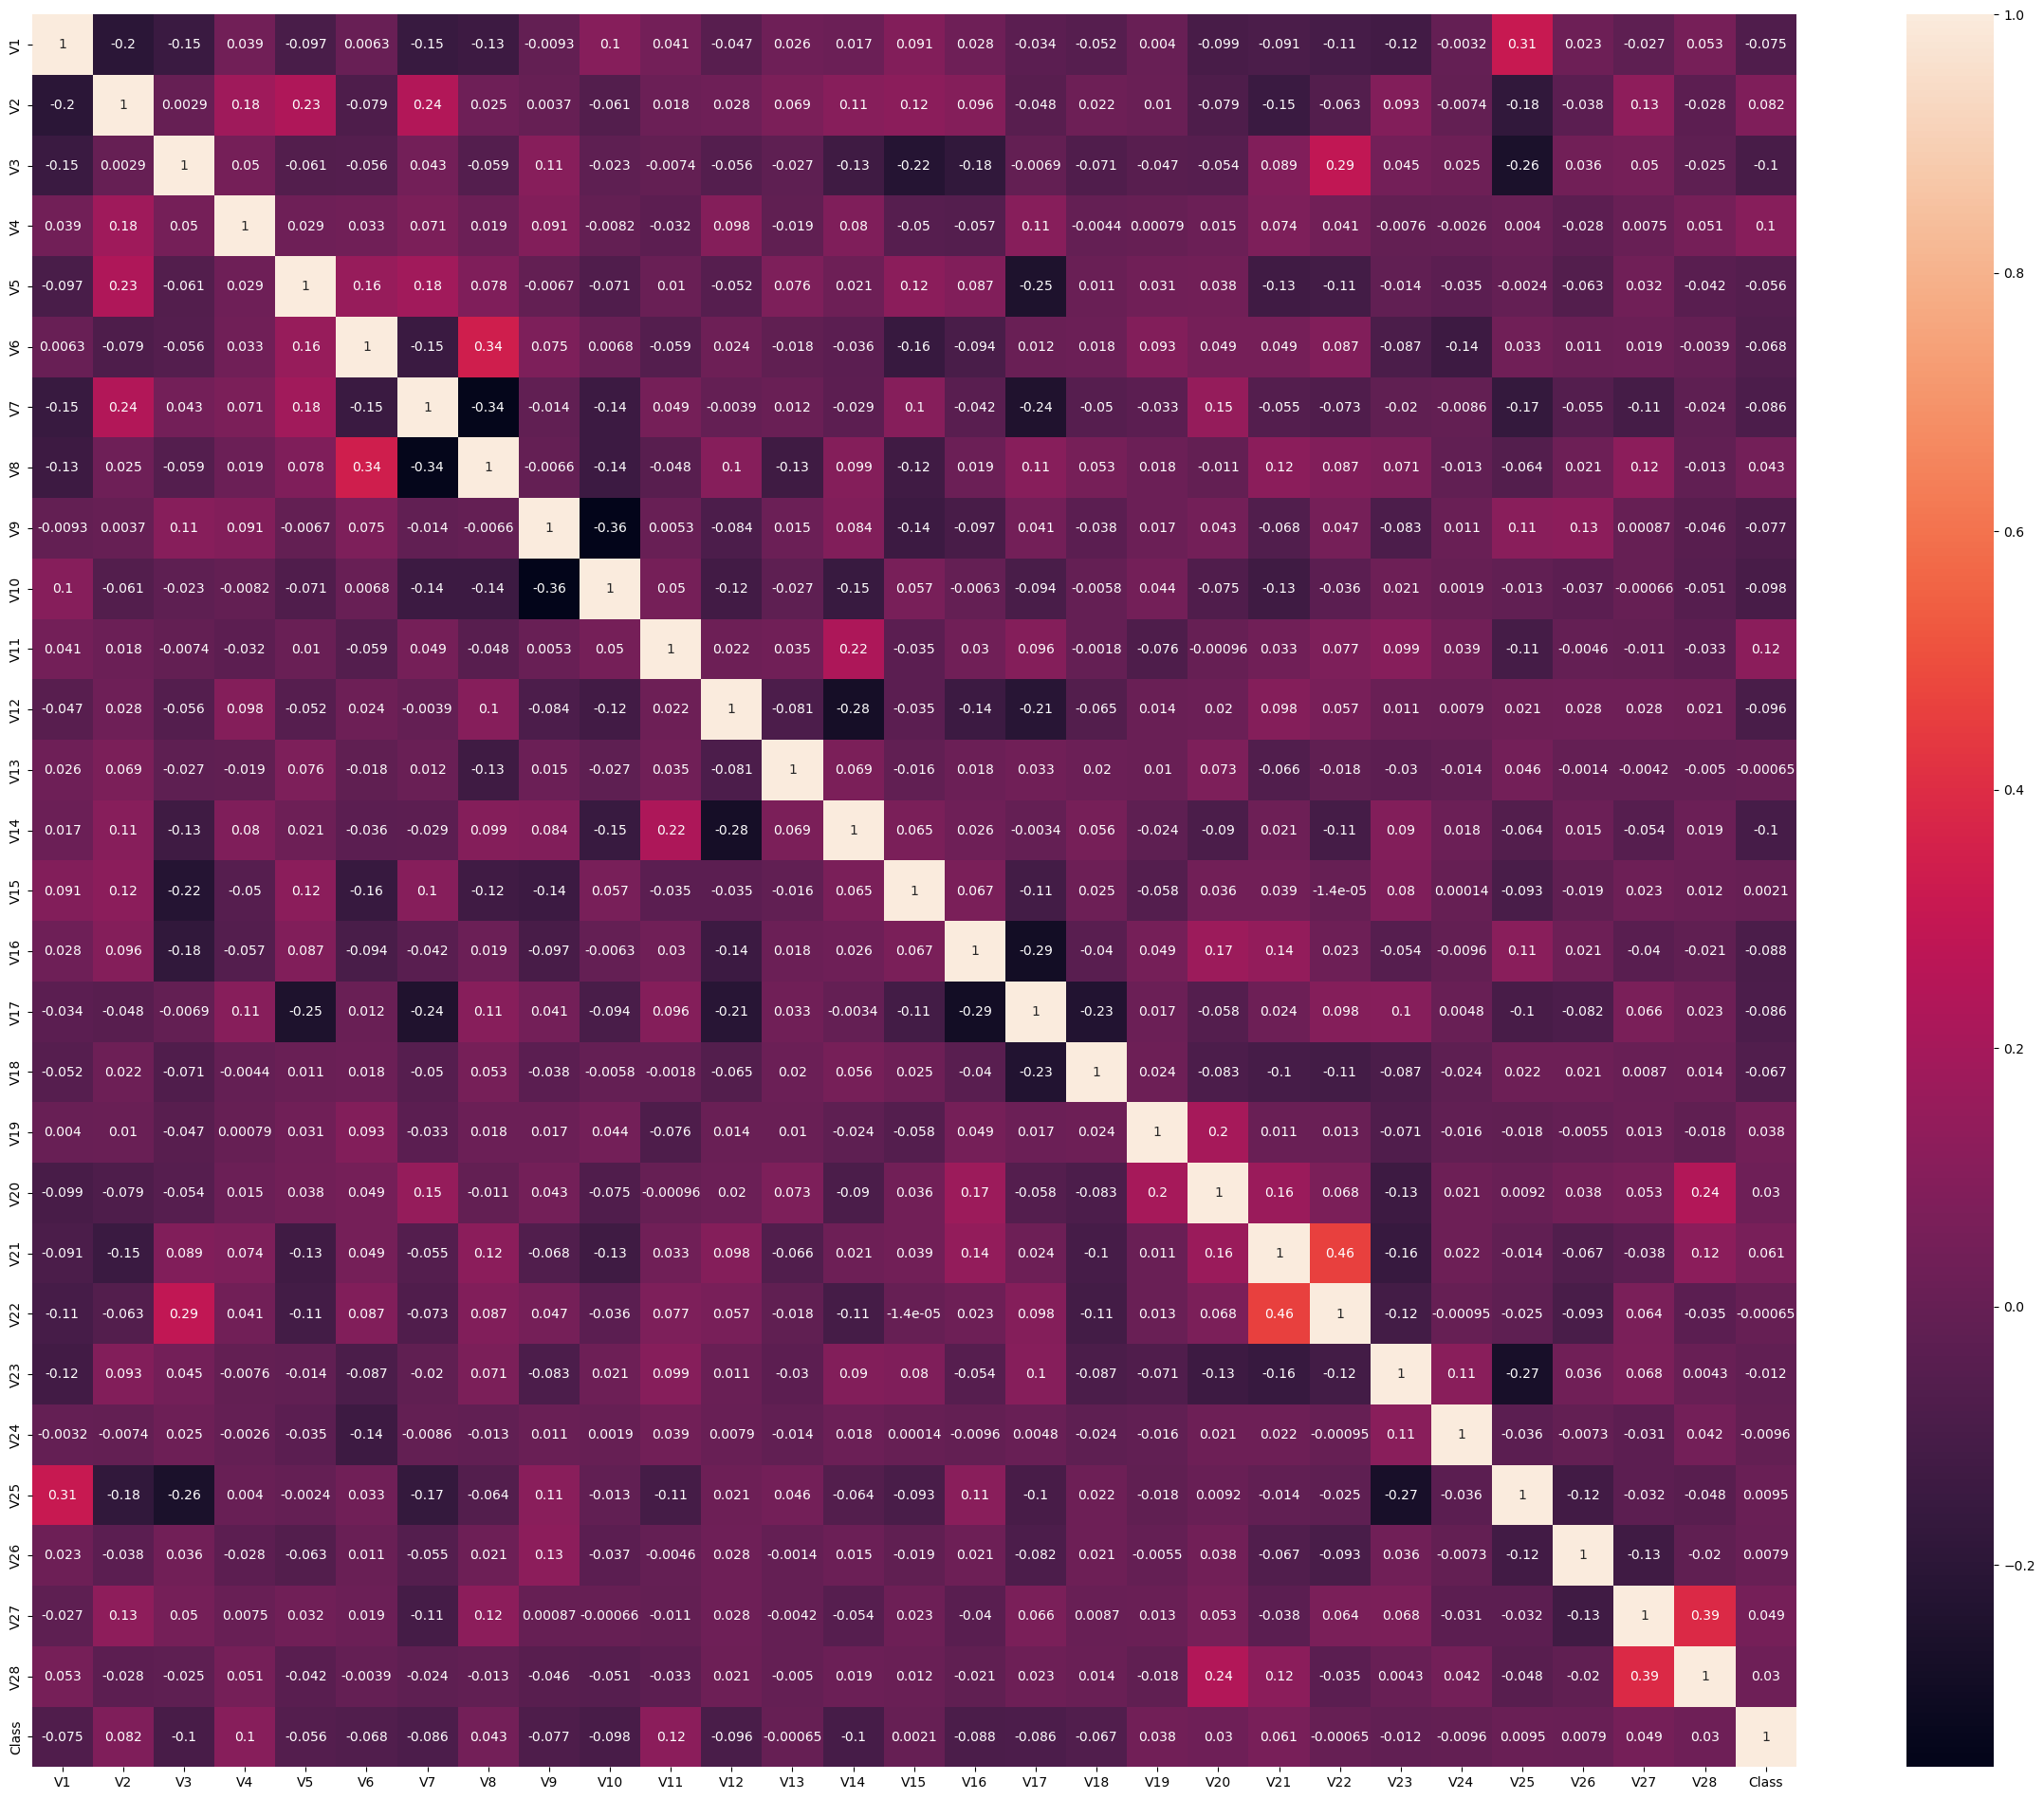

In [ ]:
credit_df.corr()
plt.figure(figsize=(30, 24))
sns.heatmap(credit_df.corr(), annot = True)
plt.show()

According to the heatmap above, the 4 features that correlate to genuine transactions are:

V11 = 0.116, V4 = 0.105, V2 = 0.082, V21 = 0.061,

This is because genuine transactions are correlated with the highest positive values which are the ones I stated before.

As for the fraudulent transactions, the 4 features that are correlated to that are:

V14 = -0.102, V3 = -0.101, V10 = -0.098, V12 = -0.096,

This is due to fraudulent transactions are shown with the most negative values.

***12. Analyze Classification Reports for Unbalanced Dataset: What are you observations?***

For the Unbalanced Dataset, the decision tree model has a high accuracy of 99.9% and has a high ROC-AUC which means that it is classifying well, but the precision, recall and F1-score is low which means that it is not detecting fraudulent activities well. The decision tree model tends to have false positives, thinking genuine transactions are fraud, which makes it not as reliable for identifying fraudulent activity and minimizing fraud.

For the kNN model, it achieves a slightly lower accuracy compared to the decision tree, but it is still high at 97% The kNN also has a low precision meaning that it is having a high amount of false positives. This model seems to have trouble and might continue to make false positives which does not minimize fraud.

For the SVM model, the accuracy is high, just like the decision tree model, it also has a high precision, recall, and F1-score for finding fraudulent transactions. The ROC-AUC score tells us that it is able to distinguish classes well. SVM model seems to minimize the number of false positives and false negatives which means that it is not making as many mistakes in classifying and seems to work the best compared to the other 2.


***13. Analyze Classification Reports for Balanced Dataset: What are your observations?***

For the Balanced Dataset, the decision tree model has a 79% accuracy rate which is not the best in terms of ML, it also has a low precision and F1-score for detecting fraud. It has a high recall which means it's able to identify a majority of fraud and the ROC-AUC are high so it is good at distinguishing classes, but the model seems to produce a lot of false positives(misclassifying transactions as fraudulent).

For the kNN model, there is a high accuracy compared to the decision tree, the precision is low but the F1-score is high which means that the model is able to perform better when trying to classify fraud compared to the decision tree. This model is performing better than the decision tree model.

For the SVM model, it has a high accuracy, high precision and high recall which means that it is better than the decision tree at finding fraud also. The ROC-AUC is also high which means its good at deafferenting between classes.

***14. Analyze Classification Reports from Unbalanced Dataset and Balanced Dataset: What are your observations?***

For the Decision tree model, the unbalanced dataset had a higher accuracy compared to the balanced dataset. It was also better at finding genuine transactions but had a hard time finding fraudulent transactions and tended to misclassify them.

For the kNN model, the unbalanced data and balanced data has both high accuracies, but the unbalanced data seems to misclassify a genuine transactions as fraud a lot compared to the balanced dataset.

For the SVM model, both data have high accuracies and seems to have a good performance in detecting fraudulent transactions. The unbalanced dataset seems to do better compared to the balanced dataset.

For the unbalanced data, it seems SVM performs better, but the kNN seems to work better for the balanced dataset.

***15. Analyze Learning curves: What do these curves tell us about bias and variance?***

For the Decision tree learning curve, since the training accuracy is very high, that means there is low bias, meaning that the model is able to see the patterns in the training data well. The test accuracy seems to change a lot as the size of the data increases, which means that there is higher variance in the data, so this means that the model is sensitive to changes in the training data. Low bias and high variance means that there could be a chance that overfitting could be happing in the training data.

For the kNN learning curve, there is an slow increase in the training accuracy as the size increases which might mean there is some bias. This means the model will be able to get more patterns as more data is being put into the dataset. There is low variance because the training and test accuracies are generally the same meaning that the model does not seem to be affected as intensely by changes in the training data. This model seems to be good at generalizing.

For the SVM learning curve, there is high training accuracy across the size increase meaning that there is low bias so that model will be able to get patterns easily. There is also low variance since the training and test accuracies are stable. This model seems to be good at generalizing.


***16. Your overall conclusions and recommendations for meeting the primary goal.***

My overall conclusions are that the SVM model seem to work well across both datasets and has high accuracy and can be effective when finding fraud with less false positives. The kNN model seems to do well on the balanced dataset compared to the unbalanced dataset and the decision tree seems to have the highest amount of false positives. I would recommend using the SVM model in order to minimize fraud because it shows to be effective in identifying fraud transactions without having false positives.